Nama : `Peni Ismail`

**Dataset Rockpaperscissors**

In [1]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-10-24 07:21:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.08MB/s    in 40s     

2020-10-24 07:22:13 (7.78 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil

In [4]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'scissors', 'rps-cv-images', 'paper', 'README_rpc-cv-images.txt']

**Membagi train set dan validation set**

In [5]:
!pip install split-folders

In [6]:
import splitfolders
b_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(b_dir, output = '/tmp/rockpaperscissors', seed =1337, ratio = (.8, .2))

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3717.30 files/s]


**Train set dan validation set**

In [7]:
train_dir = os.path.join(b_dir,'train')
validation_dir = os.path.join(b_dir, 'val')

In [8]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [9]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

**Direktori Rock**

In [10]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

**Direktori Paper**

In [11]:
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

**Direktori Scissors**

In [12]:
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

**Path Train dan Validasi**

In [13]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

**Direktori Baru**

In [14]:
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

**Copy Data**

In [15]:
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

**Image Data Generator**

In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**Model**

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [19]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 45s - loss: 1.1141 - accuracy: 0.3862 - val_loss: 0.8808 - val_accuracy: 0.7188
Epoch 2/20
25/25 - 44s - loss: 0.7393 - accuracy: 0.7138 - val_loss: 0.5067 - val_accuracy: 0.8562
Epoch 3/20
25/25 - 47s - loss: 0.4366 - accuracy: 0.8438 - val_loss: 0.2399 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 45s - loss: 0.2894 - accuracy: 0.8975 - val_loss: 0.2360 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 44s - loss: 0.2266 - accuracy: 0.9150 - val_loss: 0.2413 - val_accuracy: 0.9250
Epoch 6/20
25/25 - 44s - loss: 0.2041 - accuracy: 0.9212 - val_loss: 0.4259 - val_accuracy: 0.8375
Epoch 7/20
25/25 - 44s - loss: 0.1985 - accuracy: 0.9325 - val_loss: 0.1714 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 44s - loss: 0.1698 - accuracy: 0.9450 - val_loss: 0.2755 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 45s - loss: 0.2009 - accuracy: 0.9287 - val_loss: 0.2532 - val_accuracy: 0.9125
Epoch 10/20
25/25 - 44s - loss: 0.1697 - accuracy: 0.9450 - val_loss: 0.1613 - val_accuracy: 0.9563
Epoch 11/

**Accuracy dan Validasi Akurasi**

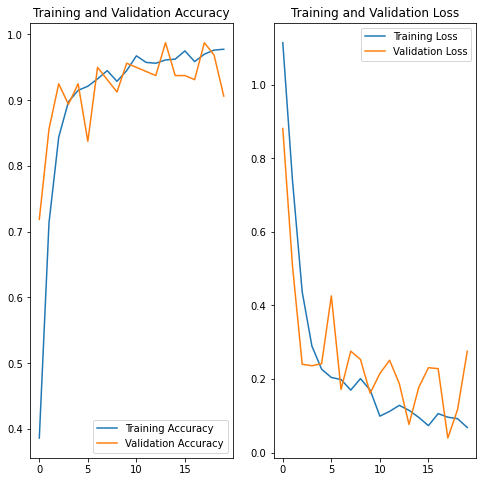

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Summary Model**

In [41]:
import cv2
import os

img_width, img_height = 300//2, 200//2

def preprocessing(img_name = None, i = None):
    if i == 0:
        img_dir = paperDir
    elif i == 1:
        img_dir = rockDir
    else:
        img_dir = scissorDir

    img = cv2.imread(img_dir+img_name) # Open image

    min_HSV = np.array([0, 60, 40], dtype = "uint8")
    max_HSV = np.array([33, 255, 255], dtype = "uint8")
    hsvImg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    binaryImg = cv2.inRange(hsvImg, min_HSV, max_HSV)
    masked = cv2.bitwise_and(img, img, mask=binaryImg)

    result = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
    result = cv2.resize(result, (img_width, img_height))
    result = np.expand_dims(result, axis=2)

    return result



paperList = os.listdir(paper_dir)
rockList = os.listdir(rock_dir)
scissorList = os.listdir(scissors_dir)

dirTest = [paperList[650:], rockList[650:], scissorList[650:]]

#model = load_model('model-dicoding-razif.h5')
model.compile(loss='binary_crossentropy',
            optimizer='SGD',
            # optimizer='adam',
            metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

**Memprediksi Gambar**

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (3).png
00nKV8oHuTGi20gq.png
rock


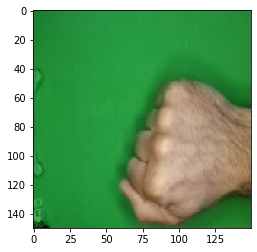

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')